# 1. What is Time Series Data
Time Series Data don't necessarily require "Time" data as long as data is aligned in
 the manner of meaningful way. <br> From below graph, we have Spectrum of light with the x-axis be spectrum of the light, and y-axis is the frequency. <br>
 This type of data don't have explicit time component, but it can be 
 expressed as a time series.

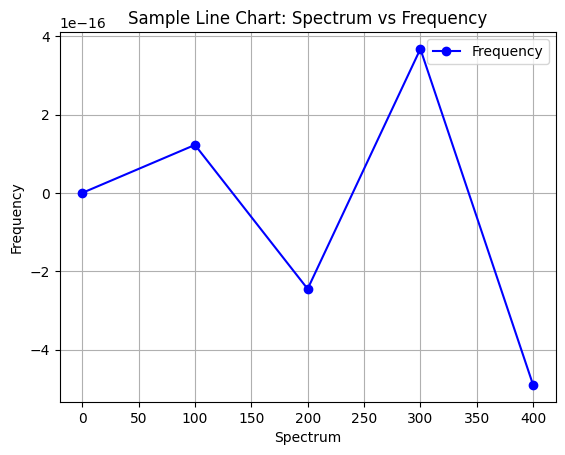

In [13]:
# 1. What is Time Series Data

import math
import matplotlib.pyplot as plt

# Sample data for the spectrum and frequency
spectrum = range(0,500,100)
frequency = [math.sin(math.pi*i) for i in range(0,5)]

# Create a line chart
plt.plot(spectrum, frequency, marker='o', linestyle='-', color='b', label='Frequency')

# Add labels and title
plt.xlabel('Spectrum')
plt.ylabel('Frequency')
plt.title('Sample Line Chart: Spectrum vs Frequency')

# Add a legend
plt.legend()

# Display the chart
plt.grid(True)
plt.show()


# 2. Handling Null

Often, we have null values in our data. Following methods are common way to manage the issue
1. Forward filling
2. Moving Average
3. Interpolation

# 3. Smoothing
 Many modern Time Series data are applied smoothing in order to make data easier to understand, remove error in measurement, outliers. Even though the outliers are actually true, it could be unfair measurement compare to others. 

# 4. Exponential Smoothin

$$
\text{Forecast at time } t = \alpha \times \text{Actual at time } t + (1 - \alpha) \times \text{Forecast at time } t-1
$$

</div>

Exponential smoothing is a time series forecasting method that assigns exponentially decreasing weights to past observations. It's particularly useful for data with a trend and/or seasonality.

Exponential smoothing can be classified into three main types:
1. **Simple Exponential Smoothing**: Suitable for data with no trend or seasonality.
2. **Double Exponential Smoothing (Holt's Method)**: Accounts for data with a trend but no seasonality.
3. **Triple Exponential Smoothing (Holt-Winters' Method)**: Suitable for data with both trend and seasonality.

Each type of exponential smoothing has its own set of equations and considerations.

Exponential smoothing is widely used in various fields, such as economics, finance, and operations management, for making short-term forecasts based on historical data.

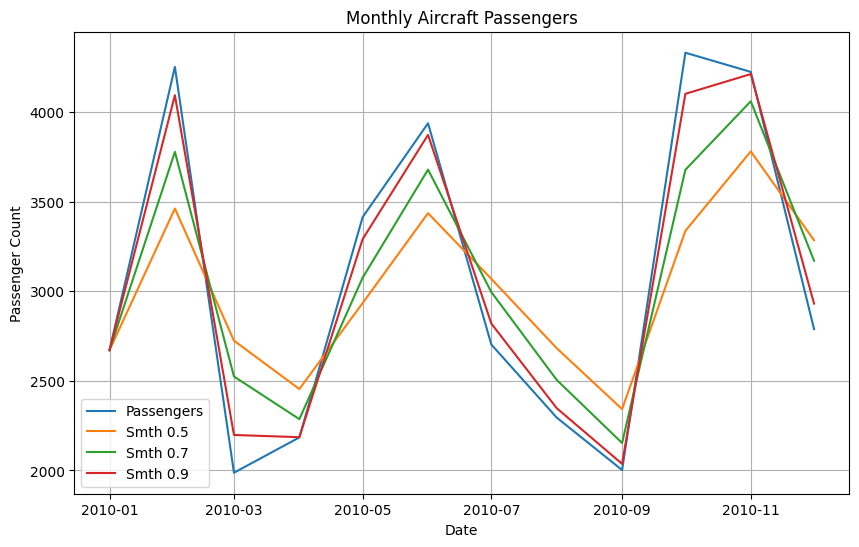

In [38]:
# 4. Exponential Smoothin

import pandas as pd
import numpy as np

def create_passenger_data(start_year, end_year):
    years = range(start_year, end_year + 1)
    months = range(1, 13)
    data = []

    for year in years:
        for month in months:
            passengers = np.random.randint(1000, 5000)  # Simulated passenger count
            data.append((year, month, passengers))

    columns = ['Year', 'Month', 'Passengers']
    passenger_df = pd.DataFrame(data, columns=columns)
    passenger_df['Date'] = pd.to_datetime(passenger_df[['Year', 'Month']].assign(day=1))
    passenger_df = passenger_df.drop(['Year', 'Month'], axis=1)
    
    return passenger_df

# Create a DataFrame with monthly passenger data from 2010 to 2023
passenger_data = create_passenger_data(2010, 2010)


# Perform Exponential Smoothing

def apply_ewm(df, col, alpha):

    df[f'Smth {alpha}'] = df[col].ewm(alpha=alpha, adjust=False).mean()
    
    return df

passenger_smt5_data = apply_ewm(passenger_data, 'Passengers', 0.5)
passenger_smt7_data = apply_ewm(passenger_smt5_data, 'Passengers', 0.7)
passenger_smt9_data = apply_ewm(passenger_smt7_data, 'Passengers', 0.9)


def plot_multi_line_chart(data_frame, x_column, y_columns, title, x_label, y_label):
    plt.figure(figsize=(10, 6))

    for y_col in y_columns:
        plt.plot(data_frame[x_column], data_frame[y_col], label=y_col)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()


# Extract column names excluding the x_column (Date)
y_columns = [col for col in passenger_smt9_data.columns if col != 'Date']

plot_multi_line_chart(
    data_frame=passenger_smt9_data,
    x_column='Date',
    y_columns=y_columns,
    title='Monthly Aircraft Passengers',
    x_label='Date',
    y_label='Passenger Count'
)


# 5. Seasonality
We can decompose the time series data into three parts <br >
1. Saasonal component
2. Trend component
3. Remainder component

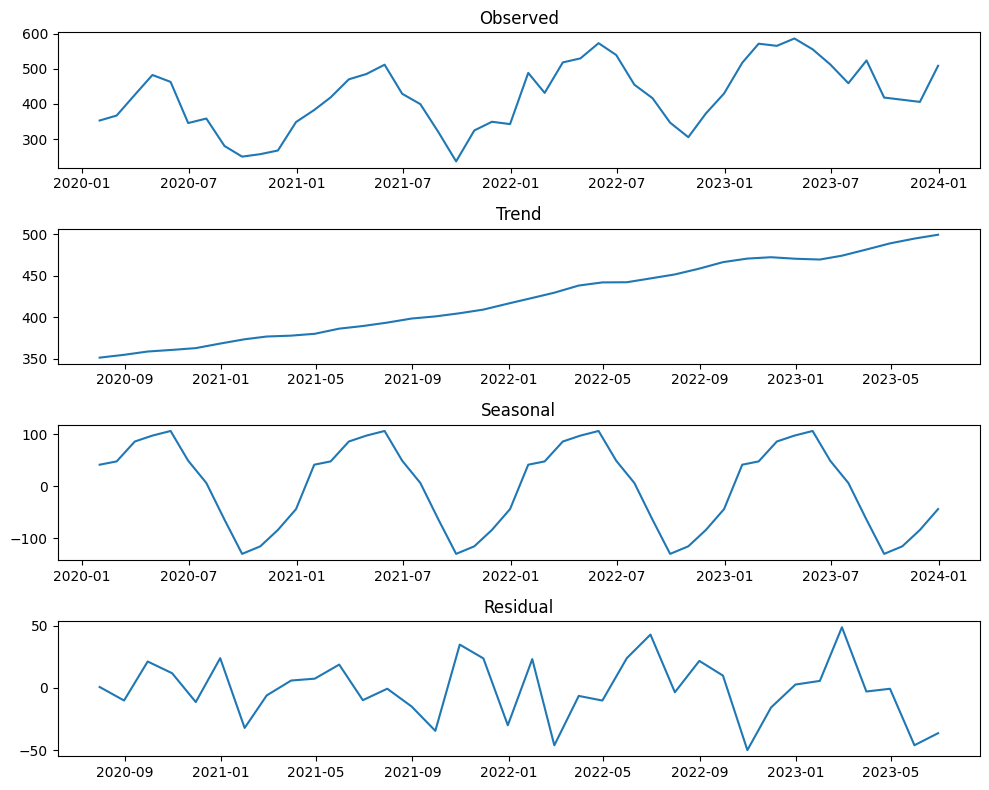

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Simulate passenger data with seasonality and a linear trend
np.random.seed(0)
dates = pd.date_range(start='2020-01-01', periods=48, freq='M')
t = np.arange(0, 48)
seasonality = 100 * np.sin(2 * np.pi * t / 12)
trend = 5 * t + 300
noise = np.random.normal(scale=30, size=48)
passengers = seasonality + trend + noise

# Create a pandas DataFrame
passenger_data = pd.DataFrame({'Date': dates, 'Passengers': passengers})
passenger_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(passenger_data['Passengers'], model='additive', period=12)

# Plot the components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()